# TD 3 | Étude de la marge EGT d'un turboréacteur

---

Objectifs du TD :

* pratiquer sur un premier use case concret d'analyse de données de moteurs d'avion
* fonctions glissantes pandas (_rolling_)
* régression linéaire

---

La table fournie contient les données moteurs disposant de l'information "marge EGT" (egthdm) issue
des rapports ACARS. Il s'agit donc uniquement de rapports extraits au décollage (TAKEOFF). On a
récupéré l'ensemble des rapports des moteurs livrés depuis avril 2016.

In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

## 1. Chargement et nettoyage des données

#### 1.1. Chargez les données ACARS à l'aide de la méthode pandas `read_excel`. Explorez les propriétés générales du jeu de données.

Fichier de données : `./data/accars_b.xlsx`.

In [92]:
#!git clone https://github.com/MadaneA/MACS3-Statistiques-Descriptives-TDs.git

In [3]:
import os
#os.chdir('MACS3-Statistiques-Descriptives-TDs')
rawdir = '/home/valentin/Documents/Cours/MACS/MACS3/madane/MACS3-Statistiques-Descriptives-TDs'
os.chdir(rawdir)

In [373]:
import pandas as pd
df = pd.read_excel('data/accars_b.xlsx')
df.head()

,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
0,CLIMB,186,10,192,1,Neutral,1.0,151.0,6.0,-0.1146,...,88.0,0.57,0.73,0.12,0.13,8.9,5.0,5.0,5335.0,0.637
1,CLIMB,186,10,192,1,Neutral,1.0,143.0,7.0,-0.2464,...,90.8,0.58,0.76,0.15,0.10,9.0,5.6,5.6,4987.0,0.624
2,CLIMB,186,10,192,1,Neutral,1.0,163.0,8.0,NaN,...,89.0,0.28,0.48,0.16,0.05,10.1,5.0,5.2,4251.0,0.530
3,CLIMB,186,10,192,1,Neutral,1.0,152.0,9.0,NaN,...,87.0,0.44,0.67,0.14,0.08,8.9,5.6,5.6,5356.0,0.380
4,CLIMB,186,10,192,1,Neutral,1.0,154.0,10.0,NaN,...,85.3,0.26,0.48,0.25,0.06,10.5,5.6,5.6,NaN,0.543


#### 1.2. Y a-t-il des valeurs manquantes ? Si oui, décrivez leur répartition et affichez le nombre de valeurs manquantes par colonne sous forme d'un bar plot.

Text(0, 0.5, 'number of NaN')

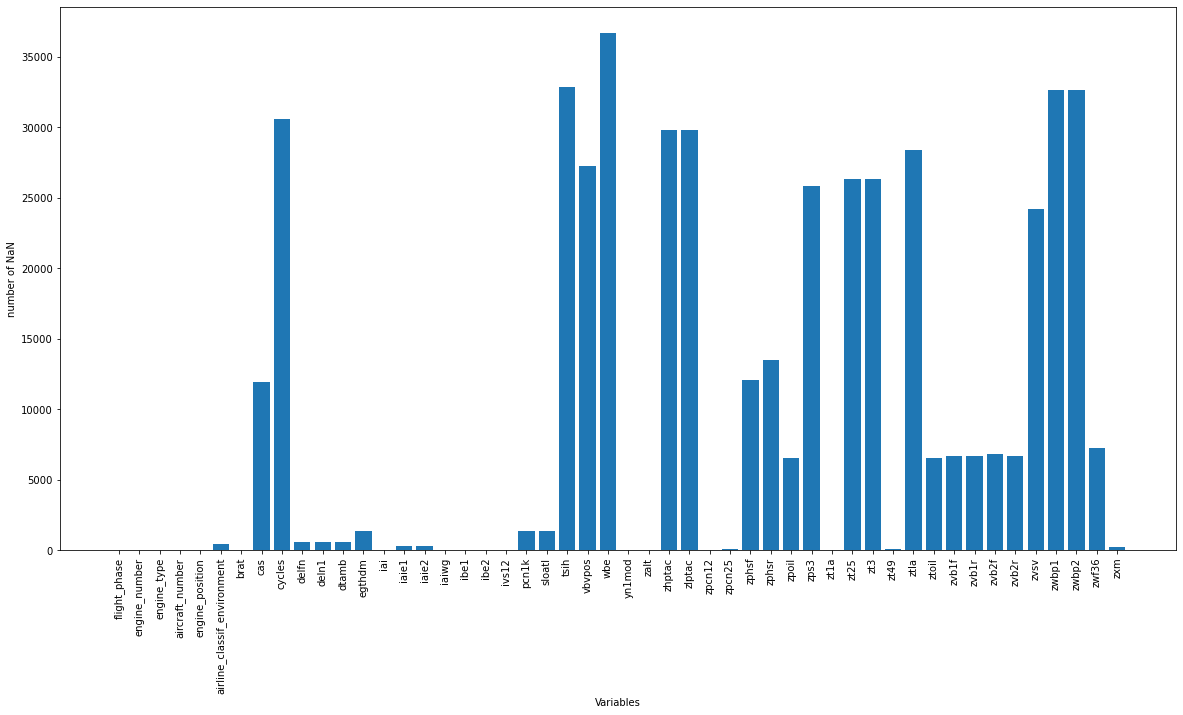

In [95]:
df.isna() # il y a effectivement des nan
nan_columns = (df.isna()*1.0).sum(axis = 0) 
plt.bar(nan_columns.index ,nan_columns.values)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel('number of NaN')

#### 1.3. Ne gardez que les lignes où le nombre de cycles (variable `cycles`) et la marge EGT (variable `egthdm`) sont présentes.

In [96]:
idx_cycle = df.cycles.isna()
idx_egt = df.egthdm.isna()
df2 = df[~(idx_egt + idx_cycle)]
df2

,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
104,TAKEOFF,186,10,192,1,Neutral,0.0,88.0,5.0,23.8191,...,84.3,0.39,0.58,0.05,0.15,12.3,0.2,0.0,NaN,0.133
105,TAKEOFF,186,10,192,1,Neutral,0.0,93.0,6.0,25.4038,...,95.1,0.24,0.69,0.16,0.10,11.1,0.2,0.0,NaN,0.148
106,TAKEOFF,186,10,192,1,Neutral,0.0,92.0,7.0,22.7509,...,81.6,0.23,0.46,0.13,0.11,12.1,0.3,0.0,NaN,0.140
107,TAKEOFF,186,10,192,1,Neutral,0.0,87.0,8.0,22.1533,...,87.8,0.59,0.80,0.12,0.13,11.1,0.2,0.0,NaN,0.140
108,TAKEOFF,186,10,192,1,Neutral,0.0,88.0,9.0,23.8673,...,79.3,0.43,0.47,0.13,0.17,12.5,0.3,0.0,NaN,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46575,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,19.0,13.0466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292
46576,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,44.0,12.7586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286
46577,TAKEOFF,289,7,153,2,Neutral,1.0,NaN,67.0,14.8291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304
46599,TAKEOFF,328,7,154,2,Neutral,1.0,NaN,32.0,12.7096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286


#### 1.4. Affichez les différents types de moteurs (indice : utilisez la méthode `unique()`).

In [99]:
df2.engine_type.unique()

array([10,  5,  7])

#### 1.5. Sélectionnez uniquement les moteurs de type 10. Combien y a-t-il d'avions distincts ? Combien de vols par avion ? (attention : il y a 2 moteurs sur un avion)

In [100]:
len(df2.loc[df2['aircraft_number']== 192])/2

126.0

In [101]:
# selection des avions disctincts de type 10
nb_avions_distincts = len((df2.loc[df2['engine_type']==10,'aircraft_number']).unique())
print(f'nombre d avion avec un moteur de type 10 :  {nb_avions_distincts}')

engine_number_sel = (df2.loc[df2['engine_type']==10,'aircraft_number']).unique()

for aircraft in engine_number_sel :
    number_of_flights = int(len(df2.loc[df2['aircraft_number']== aircraft])/2)
    print(f'il y a {number_of_flights} vols sur l avion numero {aircraft}' )

nombre d avion avec un moteur de type 10 :  5
il y a 126 vols sur l avion numero 192
il y a 97 vols sur l avion numero 14
il y a 17 vols sur l avion numero 11
il y a 110 vols sur l avion numero 190
il y a 6 vols sur l avion numero 191


## 2. Étude de la marge EGT de l'avion 190

#### 2.1. Récupérez les variables `engine_number`, nombre de cycles (`cycles`) et marge EGT (`egthdm`) pour l'avion identifié par le numéro 190.

In [102]:
aircraft_190 = df2.loc[df2['aircraft_number']==190, ['engine_number', 'cycles', 'egthdm']]
aircraft_190

,engine_number,cycles,egthdm
11398,179,98.0,52.0118
11399,180,69.0,57.6415
11400,180,75.0,48.7217
11755,179,0.0,37.6572
11756,179,1.0,37.2208
...,...,...,...
45809,180,48.0,51.9444
45810,180,58.0,59.0032
46111,179,163.0,45.8711
46411,179,30.0,56.5585


#### 2.2. Affichez la courbe de l'évolution de la marge EGT au cours du temps pour les deux moteurs de l'avion, sur deux graphes séparés et en prenant soin d'ajouter des légendes.

<AxesSubplot:xlabel='cycles', ylabel='engine2 EGT'>

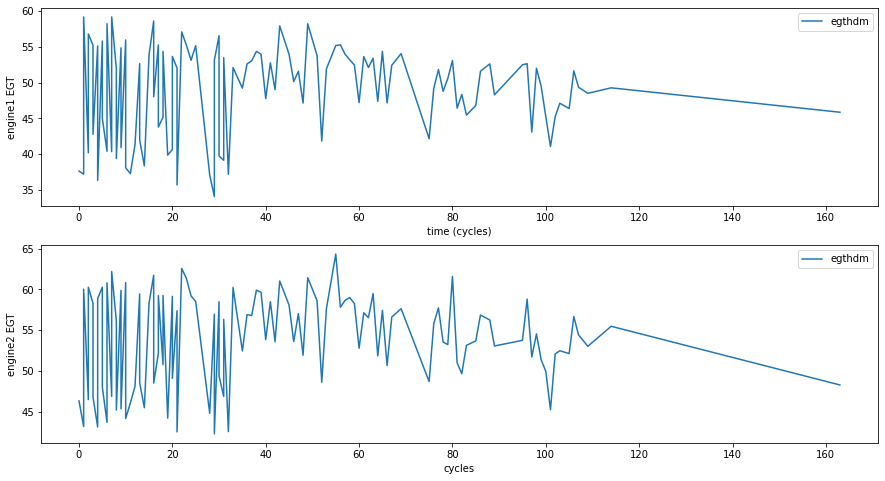

In [118]:
engine1 = aircraft_190.loc[aircraft_190['engine_number']==179, ['egthdm', 'cycles']]
engine1.sort_values(by='cycles', inplace=True)
engine1.set_index('cycles', inplace=True)
engine2 = aircraft_190.loc[aircraft_190['engine_number']==180, ['egthdm', 'cycles']]
engine2.sort_values(by='cycles', inplace=True)
engine2.set_index('cycles', inplace=True)

fig, axs = plt.subplots(2, figsize= (15,8))
engine1.plot(ax= axs[0], ylabel='engine1 EGT', xlabel='time (cycles)')
engine2.plot(ax= axs[1], ylabel='engine2 EGT',xlabel='cycles')

#### 2.3. Pour la suite, on ne s'intéresse qu'au moteur 179. Quel est le nombre de vols manquant dans les données ?

Ne sachant pas le nombre de cycle totaux lors d'une étude, je vais supposer qu'il y a un nombre maximum de cycle atteint par au moins un des moteurs de tout le jeu de donnnées. Celui ci me donnera une référence pour comparer avec le moteur 179.

In [130]:
engine1.reset_index(inplace=True)

max1 = max(df.cycles)-len(engine1.cycles.unique())
max2 = max(engine1.cycles)- len(engine1.cycles.unique())
print(f"le nombre de donnees manquantes si l'on considere qu'il y a {max(df.cycles)} cycles dans le moteur 179 est donc de {max1}")
print(f"le nombre de donnees manquantes si l'on considere qu'il y a {max(engine1.cycles)} cycles (a savoir le max des cycles du moteurs connu) est donc de {max2}")

le nombre de donnees manquantes si l'on considere qu'il y a 430.0 cycles dans le moteur 179 est donc de 339.0
le nombre de donnees manquantes si l'on considere qu'il y a 163.0 cycles (a savoir le max des cycles du moteurs connu) est donc de 72.0


#### 2.4. Nettoyage de la marge EGT

On constate que sur un même cycle, il peut y avoir 2 valeurs de la variable `egthdm` mesurées. On ne souhaite garder que la plus grande des deux, et avoir une seule ligne par cycle, afin que l'on puisse utiliser le nombre de cycles comme index. Enfin, on veut compléter l'index pour les vols manquants, en remplissant les lignes par `NaN`. Pour cela, effectuez l'exercice suivant:

1. Utilisez une aggrégation pour obtenir la plus grande valeur à chaque cycle et stockez le résultat dans une Series pandas appelée 'egt'.
2. Ré-indexez le DataFrame pour avoir une ligne pour tout nombre de cycles (indice : passez par la méthode reindex).

In [368]:
engine1 = aircraft_190.loc[aircraft_190['engine_number']==179, ['egthdm', 'cycles']]
number_max_of_cycles = int(max(engine1.cycles)+1)
engine1.sort_values(by=['cycles', 'egthdm'],inplace=True)
engine1.reset_index(inplace=True)
engine1.drop_duplicates(subset='cycles', keep='last', inplace=True)

nan_vect = np.ones(number_max_of_cycles)*(-1)
df_compare = pd.DataFrame({'egthdm': nan_vect,'cycles': np.linspace(0, number_max_of_cycles-1, number_max_of_cycles) })

egt= pd.merge(df_compare, engine1, how='outer').sort_values(by=['cycles', 'egthdm']).drop_duplicates(subset='cycles', keep= 'last').set_index('cycles').drop(columns='index').replace(-1, np.nan)
egt


,egthdm
cycles,
0.0,37.6572
1.0,59.1796
2.0,56.8104
3.0,55.2263
4.0,55.1283
...,...
159.0,NaN
160.0,NaN
161.0,NaN


#### 2.5. On souhaite lisser les valeurs et se débarasser des outliers à l'aide d'une médiane glissante sur 15 cycles. Affichez sur un même graphe la marge EGT brute (points) et la marge lissée (ligne).
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling

Utilisez une fenêtre glissante de taille 15 cycles, avec un minimum de 3 observations non-nulles par fenêtre (paramètre `min_periods`).

Text(0, 0.5, 'EGT')

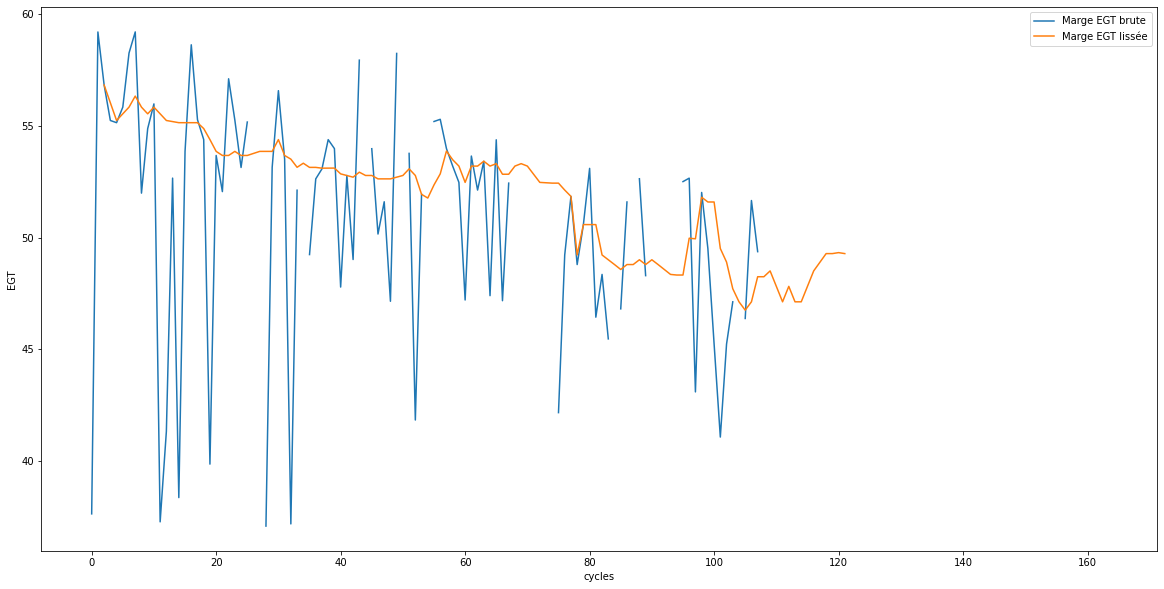

In [254]:
egt_rolling = egt.rolling(window=15, min_periods=3).median()

fig, ax = plt.subplots()
egt.plot(ax =ax)
egt_rolling.plot(ax = ax )
plt.legend( ['Marge EGT brute', 'Marge EGT lissée'])
plt.ylabel('EGT')

#### 2.6. Nettoyage de la marge EGT lissée

La marge EGT ne peut être que décroissante, sauf en cas de nettoyage moteur (waterwash) ou peut-être à cause d'éléments extérieurs, on va donc éviter de tenir compte des remontées de marge et ne prendre en considération que les points descendants. Cette estimation est pessimiste mais évite de prendre en compte ces facteurs extérieurs.

1. Calculez une série ne contenant que les valeurs décroissantes de la marge EGT lissée.
2. Sur le graphique précédent, ajoutez ces points par-dessus la courbe.

In [310]:
data  = np.array(egt_rolling['egthdm'].dropna())
cycles_drop = egt_rolling.dropna().index

val = data[0]
for i in range(len(data)-1):
    if data[i+1]>val :
        data[i+1]=-1
    else : 
        val = data[i+1]

egt_non_decreasing = pd.DataFrame({'egthdm' : data, 'cycles': cycles_drop})


# merging the results with the whole vector
nan_vect = np.ones(number_max_of_cycles)*(-1)
df_compare = pd.DataFrame({'egthdm': nan_vect,'cycles': np.linspace(0, number_max_of_cycles-1, number_max_of_cycles) })

egt_non_decreasing= pd.merge(df_compare, egt_non_decreasing, how='outer').sort_values(by=['cycles', 'egthdm']).drop_duplicates(subset='cycles', keep= 'last').set_index('cycles').replace(-1, np.nan)
egt_non_decreasing


,egthdm
cycles,
0.0,NaN
1.0,NaN
2.0,56.81040
3.0,56.01835
4.0,55.22630
...,...
159.0,NaN
160.0,NaN
161.0,NaN


Text(0, 0.5, 'EGT')

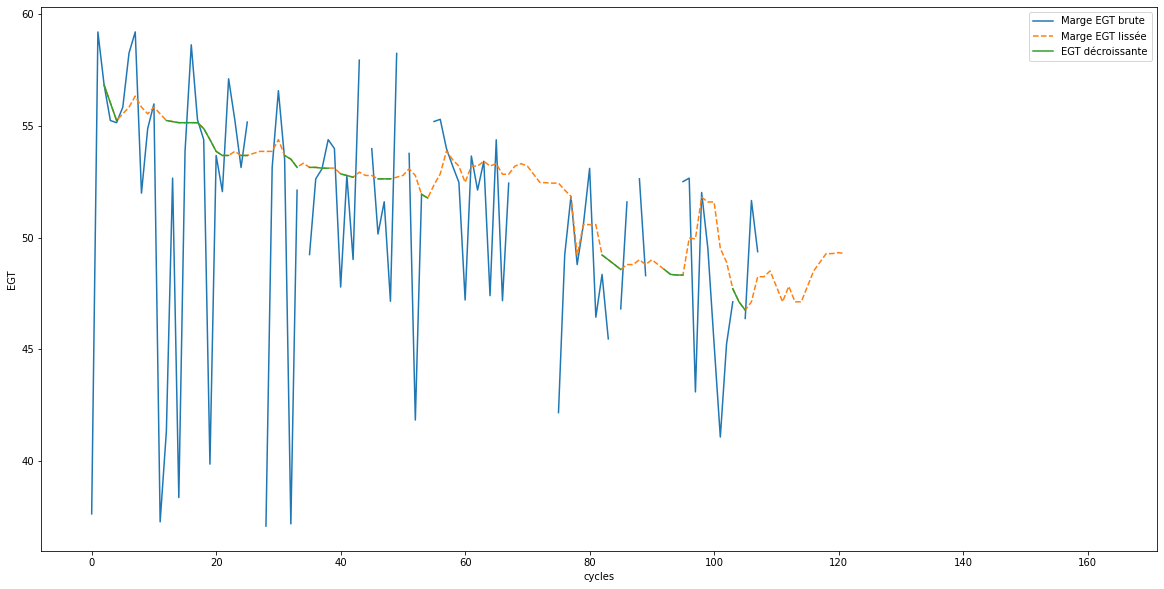

In [315]:
fig, ax = plt.subplots()
egt.plot(ax =ax)
egt_rolling.plot(ax = ax , style = '--')
egt_non_decreasing.plot(ax=ax)
plt.legend( ['Marge EGT brute', 'Marge EGT lissée', 'EGT décroissante'])
plt.ylabel('EGT')

#### 2.7. Estimation de la pente de la marge EGT

La pente de la marge EGT est un indicateur très intéressant de l'usure du moteur. On l'estime par régression linéaire par rapport au nombre de cycles. Pour cela, on utilise les points conservés précédemment qui constituent une estimation pessimiste.

Pour la régression linéaire, on utilisera le modèle `LinearRegression` de scikit-learn. Son utilisation est similaire aux autres modèles de scikit-learn :
```python
lr = LinearRegression()
model = lr.fit(X, y)
```

1. Apprenez un modèle `LinearRegression` sur les données calculées précédemment. Affichez les coefficients et l'ordonnée à l'origine (_intercept_) du modèle obtenu. Les valeurs sont-elles cohérentes ? (indices : pour passer d'un objet pandas (DataFrame ou Series) à un array numpy, utilisez la propriété `values`)
2. Tracez la droite obtenue sur le graphe précédent.

In [4]:
from sklearn.linear_model import LinearRegression

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [370]:
data = egt_non_decreasing.dropna()
EGT_f  =data['egthdm'].values
CYCLES = data.index.values

X = np.ones((len(EGT_f),2))
X[:,1]= CYCLES
lf = LinearRegression(fit_intercept=False)
model = lf.fit(X, EGT_f)

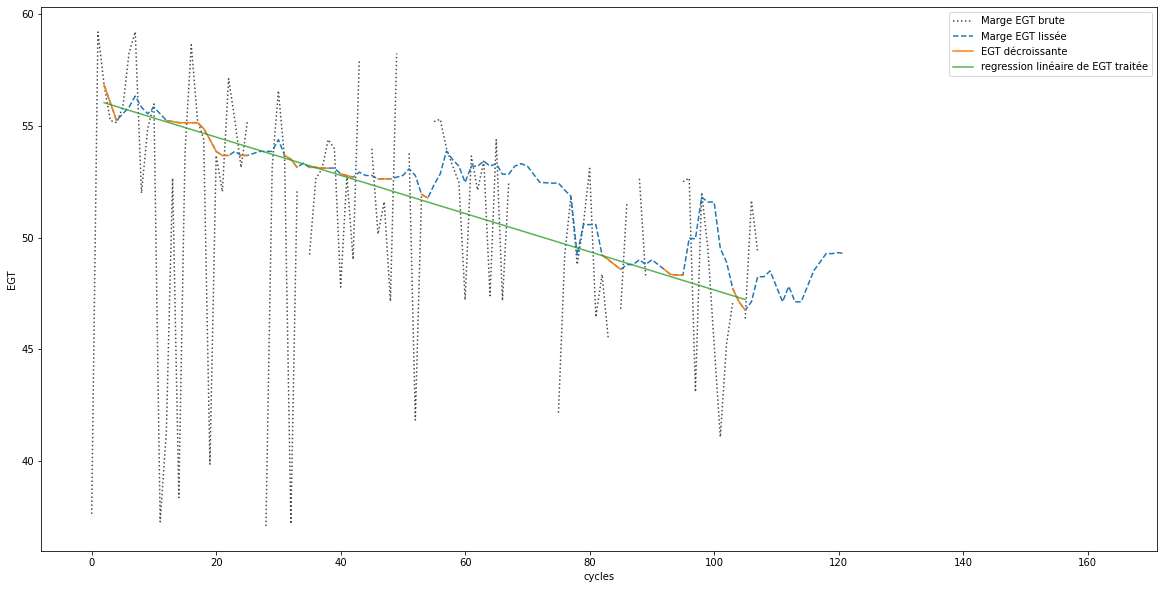

In [361]:
fig, ax = plt.subplots()
egt.plot(ax =ax, color = 'k', alpha = 0.7, style = ':')
egt_rolling.plot(ax = ax , style = '--')
egt_non_decreasing.plot(ax=ax)

plt.ylabel('EGT')
ax.plot(CYCLES, model.coef_[0]+ model.coef_[1]*CYCLES, alpha = 0.8 )
plt.legend( ['Marge EGT brute', 'Marge EGT lissée', 'EGT décroissante', 'regression linéaire de EGT traitée'])

### 3. Écriture d'une fonction de calcul de la pente EGT pour tous les moteurs

Tout d'abord, bravo si vous êtes arrivés jusque là ! Toutes les opérations que l'on a effectuées ont permis d'estimer la pente de la marge EGT du moteur 179 de l'avion 190 de type 10, et donc son usure. Maintenant, on souhaite répéter ce processus sur tous les moteurs ! Pour cela, il faudra créer une fonction Python générique, prenant en entrée l'ensemble du jeu de données ACARS et produisant en sortie l'ensemble des pentes/intercept des modèles de régression linéaire appris pour chaque moteur.

L'un des intérêts est de pouvoir prédire l'usure des moteurs, après un nombre de cycles donné.

Voici le squelette de la fonction à écrire (en ré-utilisant et adaptant tout les morceaux de code précédents) :

```python
def regress_egt_margin(df_acars):
    ...
    return df_regress_models # Contient les pentes et intercept pour tous les moteurs
```

In [29]:
def regress_egt_margin(df_acars):
    # init
    Engine = []
    Slope = []
    Intercept = []
    Engine_type = []

    # liste des moteurs 
    idx_cycle = df_acars.cycles.isna()
    idx_egt = df_acars.egthdm.isna()
    list_of_engine_numbers = df_acars[~(idx_egt + idx_cycle)].engine_number.unique()

    # loop on engine number
    for engine_number in list_of_engine_numbers :
        # selection of the engine 
        df_engine =  df_acars.loc[df_acars['engine_number']==engine_number, ['cycles', 'egthdm', 'engine_type']]
        engine_type = df_engine['engine_type'].iloc[0]
        
        # eliminate duplicated values (and select the max)
        df_engine.sort_values(by=['cycles', 'egthdm'],inplace=True)
        number_max_of_cycles = int(max(df_engine.cycles)+1)
        df_engine.reset_index(inplace=True)
        df_engine.drop_duplicates(subset='cycles', keep='last', inplace=True)

        # merge with nan (in roder to apply rolling method)
        nan_vect = np.ones(number_max_of_cycles)*(-1)
        df_compare = pd.DataFrame({'egthdm': nan_vect,'cycles': np.linspace(0, number_max_of_cycles-1, number_max_of_cycles) })
        egt= pd.merge(df_compare, df_engine, how='outer').sort_values(by=['cycles', 'egthdm']).drop_duplicates(subset='cycles', keep= 'last').set_index('cycles').drop(columns='index').replace(-1, np.nan)

        # smoothing egt with median method
        egt_rolling = egt.rolling(window=15, min_periods=3).median()

        # eliminate increasing values 
        data  = np.array(egt_rolling['egthdm'].dropna())
        cycles_drop = egt_rolling.dropna().index

        if (len(data)>0):
            val = data[0]
            for i in range(len(data)-1):
                if data[i+1]>val :
                    data[i+1]=-1
                else : 
                    val = data[i+1]
            
            # regression
            X = np.ones((len(cycles_drop),2))
            X[:,1]= cycles_drop
            y = data
            lf = LinearRegression(fit_intercept=False)
            model = lf.fit(X, y) 
            slope = model.coef_[1]
            intercept = model.coef_[0]
            
            # save values of the regression
            Slope.append(slope)
            Intercept.append(intercept)
            Engine.append(engine_number)
            Engine_type.append(engine_type)


    # dataframe de sortie

    df_regress_models= pd.DataFrame({'slope': Slope,   'intercept': Intercept, 'Engine': Engine, 'Engine_type': Engine_type})
    df_regress_models.set_index('Engine',inplace=True)
    df_regress_models.sort_index(inplace=True)
    return df_regress_models

In [20]:
df_acars = pd.read_excel('data/accars_b.xlsx')


In [30]:
df_reg  =regress_egt_margin(df_acars)
df_reg

,slope,intercept,Engine_type
Engine,,,
1,-0.444226,64.945312,5
2,-0.425064,68.098159,5
3,-0.342890,54.346740,5
4,-0.405793,62.372113,5
5,-0.149831,42.604307,5
...,...,...,...
325,-0.119288,34.943959,7
328,-0.176283,43.799772,7
336,-0.116171,35.930837,7


### 4. Comparaison de l'usure des 3 types de moteurs

#### 4.1. Prédiction de la marge EGT au 150ème par type de moteur

1. Pour chaque moteur, utilisez son modèle de régression pour prédire la valeur de la marge EGT après 150 cycles d'utilisation (indice : méthode `apply`).
2. Représentez ces valeurs par type moteur sur un box plot. Décrivez le résultat obtenu.
3. Calculez la moyenne de la marge au 150ème cycle par type de moteur. Quel type de moteur a la plus grande marge moyenne après 150 cycles ?

In [31]:
df_reg['prediction_150']  = 150 * df_reg.slope + df_reg.intercept
df_reg

,slope,intercept,Engine_type,prediction_150
Engine,,,,
1,-0.444226,64.945312,5,-1.688633
2,-0.425064,68.098159,5,4.338498
3,-0.342890,54.346740,5,2.913222
4,-0.405793,62.372113,5,1.503127
5,-0.149831,42.604307,5,20.129622
...,...,...,...,...
325,-0.119288,34.943959,7,17.050815
328,-0.176283,43.799772,7,17.357271
336,-0.116171,35.930837,7,18.505164


5          AxesSubplot(0.1,0.559091;0.363636x0.340909)
7     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
10             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

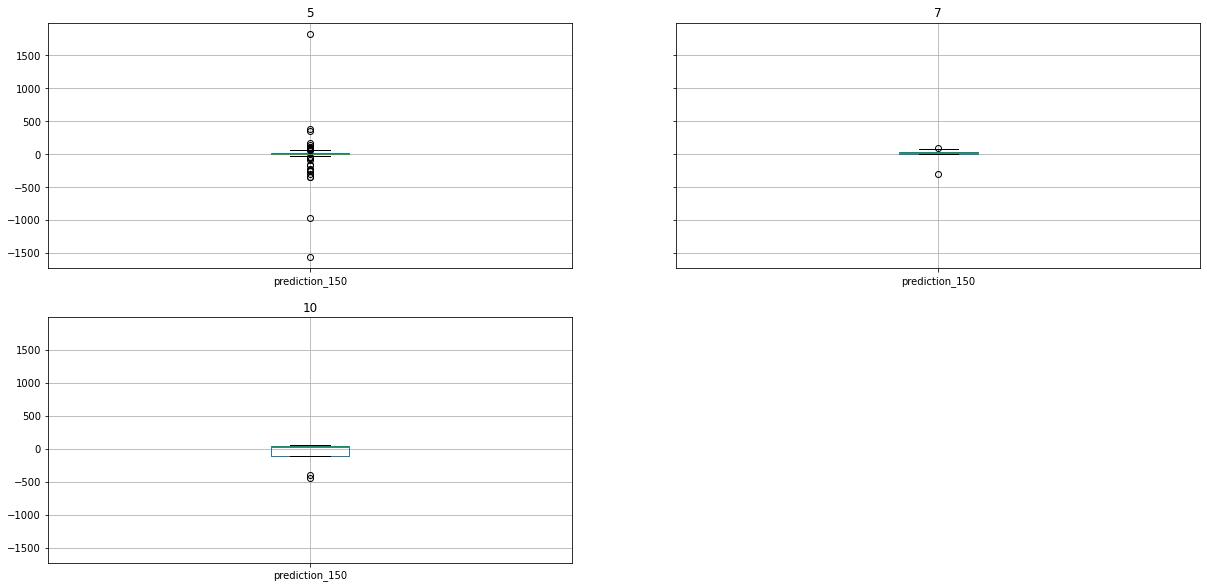

In [47]:
df_reg.groupby(by='Engine_type').boxplot(subplots=True, column='prediction_150')

Engine_type
5      0.610672
7     11.460838
10   -80.078188
Name: prediction_150, dtype: float64

In [52]:
# moyenne de la marge egt apres 150 cycles 
mean = df_reg.groupby('Engine_type').mean()['prediction_150']
for type in df_reg.Engine_type.unique() :
    print(f"la valeur moyenne de la marge EGT au bout de 150 cycles du moteur de type {type} est de {mean[type]}")

la valeur moyenne de la marge EGT au bout de 150 cycles du moteur de type 5 est de 0.6106720971546585
la valeur moyenne de la marge EGT au bout de 150 cycles du moteur de type 10 est de -80.07818793619495
la valeur moyenne de la marge EGT au bout de 150 cycles du moteur de type 7 est de 11.460838396631816


Le moteur ayant la plus grande marge EGT au bout de 50 cyles est le moteur de type 7.

#### 4.3. Vitesse de décroissance de la marge EGT par type de moteur

La pente de la marge EGT correspond à sa vitesse de décroissance par cycle.

1. Quelle est son unité ?
2. Représentez ces valeurs par type de moteur sur un boxplot. Décrivez le résultat obtenu.
3. Calculez moyenne de la pente par type de moteur. Quel type de moteur a la plus faible vitesse de décroissance et donc la plus faible vitesse d'usure ?

1. Il s'agit de degrés Celcius par cycle

2. Le moteur de type 5 ont le plus de valeurs abérrantes. Les moteurs de type 5 et 7 sont ceux ayant des amplitudes les plus faibles (par rapport au type 10).

5          AxesSubplot(0.1,0.559091;0.363636x0.340909)
7     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
10             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

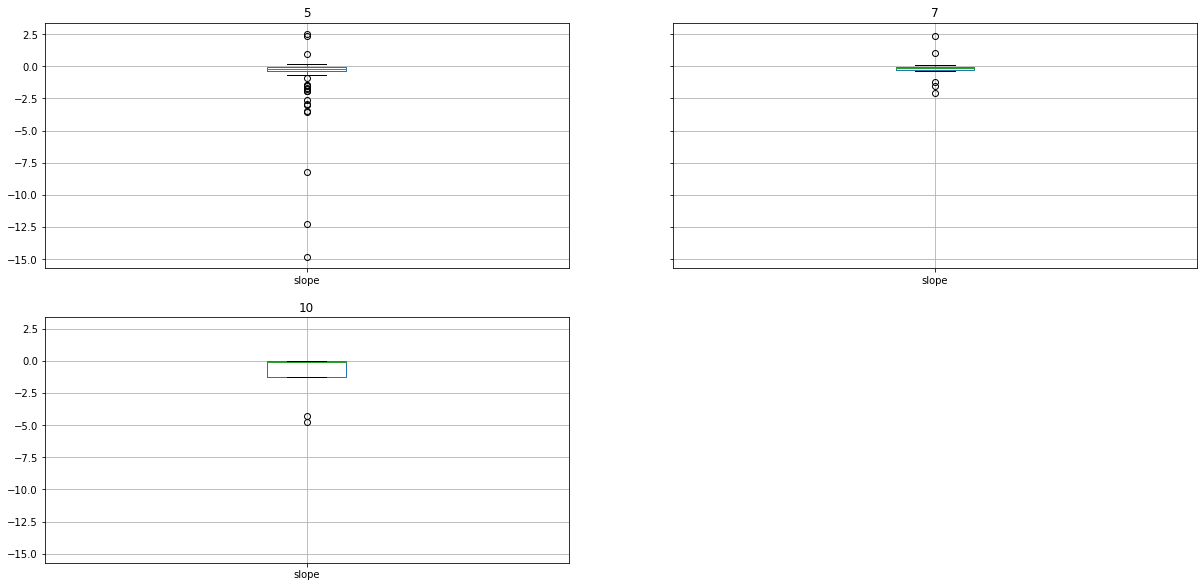

In [51]:
df_reg.groupby(by='Engine_type').boxplot(subplots=True, column='slope')

In [53]:
# moyenne de la marge egt apres 150 cycles 
mean = df_reg.groupby('Engine_type').mean()['slope']
for type in df_reg.Engine_type.unique() :
    print(f'la valeur moyenne de la vitesse de décroissance par cycle pour un moteur de type {type} est de {mean[type]}')

la valeur moyenne de la vitesse de décroissance par cycle pour un moteur de type 5 est de -0.5502274177606676
la valeur moyenne de la vitesse de décroissance par cycle pour un moteur de type 10 est de -1.1908662217101709
la valeur moyenne de la vitesse de décroissance par cycle pour un moteur de type 7 est de -0.1635616173254451


Le moteur de type 7 a la plus faible vitesse d'usure.